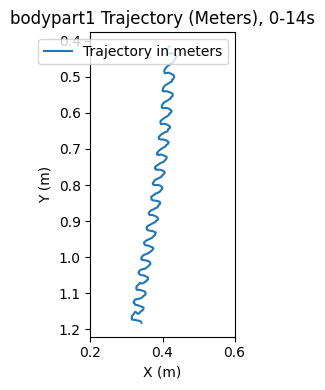

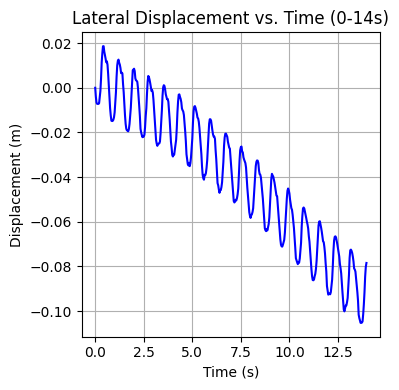

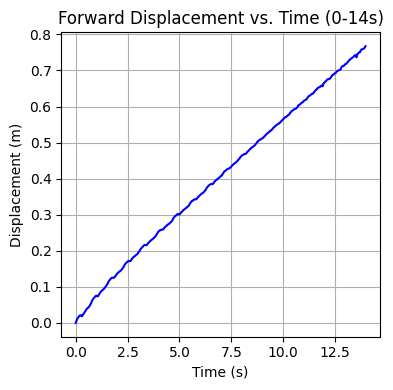

Mean forward velocity (m/s) between 0s and 14s: 0.055


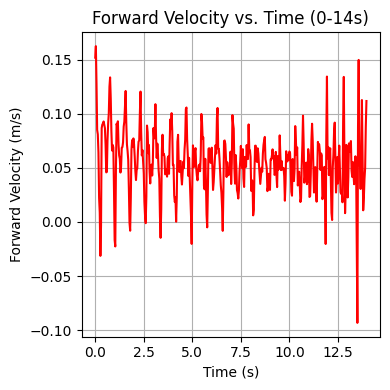

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # Update if needed, e.g., 'bodypart13'
fps = 30  # frames per second
start_time_s = 0 # start time in seconds
end_time_s = 14  # end time in seconds

# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920

# --------------------
# Load data
# --------------------
data = pd.read_csv(file_path, header=[1, 2])

# Extract x, y pixel coordinates for the chosen body part
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

# --------------------
# Crop data by time
# --------------------
start_frame = int(start_time_s * fps)
end_frame = int(end_time_s * fps)

x_pixels_cropped = x_pixels[start_frame:end_frame]
y_pixels_cropped = y_pixels[start_frame:end_frame]

# --------------------
# Convert pixels to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m = x_pixels_cropped * scale_x
y_m = y_pixels_cropped * scale_y

# --------------------
# Plot trajectory
# --------------------
plt.figure(figsize=(4, 4))
plt.plot(x_m, y_m, linestyle='-', label='Trajectory in meters')  # No marker specified

plt.title(f"{bodypart_name} Trajectory (Meters), {start_time_s}-{end_time_s}s")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.xlim(0.2,0.6)
# Make sure 1m in X is the same size as 1m in Y
plt.gca().set_aspect('equal', adjustable='box')

# If your coordinate system has Y increasing downwards, invert the Y axis
plt.gca().invert_yaxis()

plt.legend()
plt.tight_layout()
plt.show()

# --------------------
# 2) Plot displacement vs. time (X and Y)
# --------------------
# Displacement is distance from the initial position in the cropped data
x0, y0 = x_m.iloc[0], y_m.iloc[0]  # initial position
x_displacement = x_m - x0
y_displacement = y_m - y0 

# Create a time axis for the cropped frames
num_frames = len(x_m)
time_axis = np.arange(num_frames) / fps + start_time_s

# Plot lateral (x) displacement
plt.figure(figsize=(4, 4))
plt.plot(time_axis, x_displacement, linestyle='-', color='blue')
plt.title(f"Lateral Displacement vs. Time ({start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forward (y) displacement
plt.figure(figsize=(4, 4))
plt.plot(time_axis, y_displacement, linestyle='-', color='blue')
plt.title(f"Forward Displacement vs. Time ({start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------
# 3) Calculate forward velocity and print it
# --------------------
# We can use a numerical derivative of y_displacement with respect to time.
# np.gradient(...) automatically computes numerical derivative, and we provide
# the spacing in seconds (1/fps).

dt = 1.0 / fps
velocity_forward = np.gradient(y_displacement, dt)  # same length as y_displacement
mean_velocity_forward = np.mean(velocity_forward)

# Print mean forward velocity (or any other stats of interest)
print(f"Mean forward velocity (m/s) between {start_time_s}s and {end_time_s}s: "
      f"{mean_velocity_forward:.3f}")

# Optionally, plot the forward velocity over time
plt.figure(figsize=(4, 4))
plt.plot(time_axis, velocity_forward, linestyle='-', color='red')
plt.title(f"Forward Velocity vs. Time ({start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Forward Velocity (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


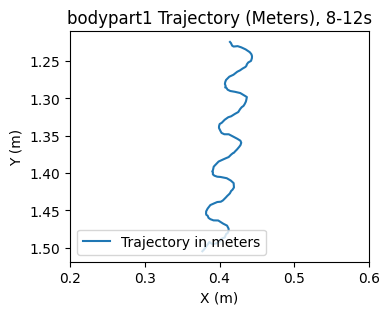

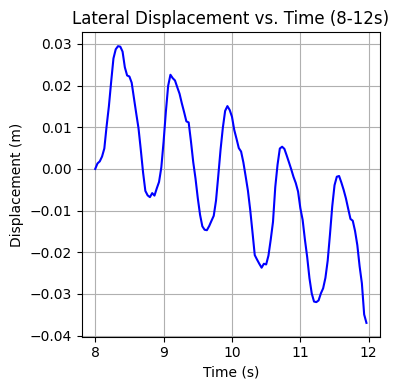

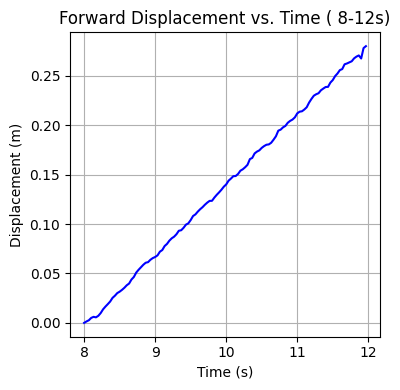

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # Update if needed, e.g., 'bodypart13'
fps = 30  # frames per second
start_time_s = 8 # start time in seconds
end_time_s = 12   # end time in seconds

# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920

# --------------------
# Load data
# --------------------
data = pd.read_csv(file_path, header=[1, 2])

# Extract x, y pixel coordinates for the chosen body part
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

# --------------------
# Crop data by time
# --------------------
start_frame = int(start_time_s * fps)
end_frame = int(end_time_s * fps)

x_pixels_cropped = x_pixels[start_frame:end_frame]
y_pixels_cropped = y_pixels[start_frame:end_frame]

# --------------------
# Convert pixels to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m = x_pixels_cropped * scale_x
y_m = y_pixels_cropped * scale_y

# --------------------
# Plot trajectory
# --------------------
plt.figure(figsize=(4, 4))
plt.plot(x_m, y_m, linestyle='-', label='Trajectory in meters')  # No marker specified

plt.title(f"{bodypart_name} Trajectory (Meters), {start_time_s}-{end_time_s}s")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.xlim(0.2,0.6)
# Make sure 1m in X is the same size as 1m in Y
plt.gca().set_aspect('equal', adjustable='box')

# If your coordinate system has Y increasing downwards, invert the Y axis
plt.gca().invert_yaxis()

plt.legend()
plt.tight_layout()
plt.show()

# --------------------
# 2) Plot displacement vs. time Y
# --------------------
# Displacement is distance from the initial position in the cropped data
x0, y0 = x_m.iloc[0], y_m.iloc[0]  # initial position
x_displacement = x_m - x0
y_displacement = y_m - y0 

# Create a time axis for the cropped frames
# e.g., 0 -> N-1 frames (where N == len(x_m)), in seconds
num_frames = len(x_m)
time_axis = np.arange(num_frames) / fps + start_time_s

plt.figure(figsize=(4, 4))
plt.plot(time_axis, x_displacement, linestyle='-', color='blue')
plt.title(f"Lateral Displacement vs. Time ({start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()



plt.figure(figsize=(4, 4))
plt.plot(time_axis, y_displacement, linestyle='-', color='blue')
plt.title(f"Forward Displacement vs. Time ( {start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


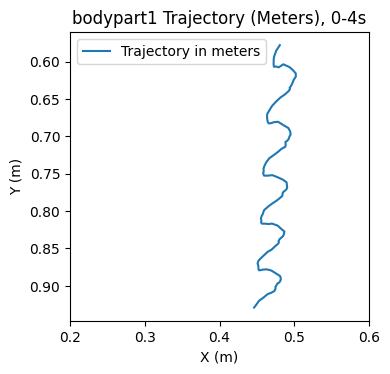

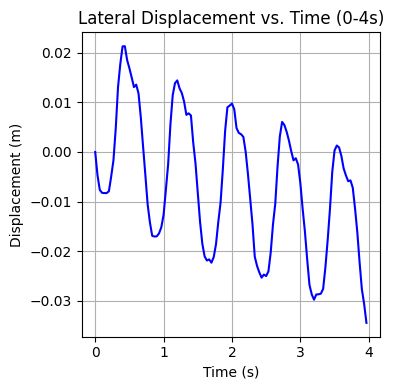

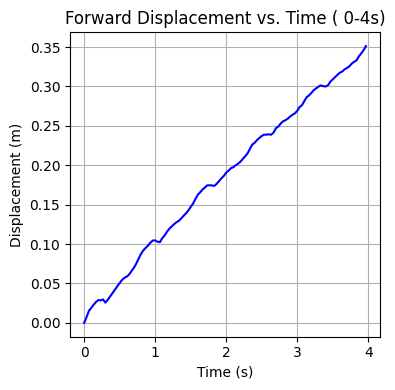

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # Update if needed, e.g., 'bodypart13'
fps = 30  # frames per second
start_time_s = 0 # start time in seconds
end_time_s = 4   # end time in seconds

# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920

# --------------------
# Load data
# --------------------
data = pd.read_csv(file_path, header=[1, 2])

# Extract x, y pixel coordinates for the chosen body part
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

# --------------------
# Crop data by time
# --------------------
start_frame = int(start_time_s * fps)
end_frame = int(end_time_s * fps)

x_pixels_cropped = x_pixels[start_frame:end_frame]
y_pixels_cropped = y_pixels[start_frame:end_frame]

# --------------------
# Convert pixels to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m = x_pixels_cropped * scale_x
y_m = y_pixels_cropped * scale_y

# --------------------
# Plot trajectory
# --------------------
plt.figure(figsize=(4, 4))
plt.plot(x_m, y_m, linestyle='-', label='Trajectory in meters')  # No marker specified

plt.title(f"{bodypart_name} Trajectory (Meters), {start_time_s}-{end_time_s}s")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.xlim(0.2,0.6)
# Make sure 1m in X is the same size as 1m in Y
plt.gca().set_aspect('equal', adjustable='box')

# If your coordinate system has Y increasing downwards, invert the Y axis
plt.gca().invert_yaxis()

plt.legend()
plt.tight_layout()
plt.show()

# --------------------
# 2) Plot displacement vs. time Y
# --------------------
# Displacement is distance from the initial position in the cropped data
x0, y0 = x_m.iloc[0], y_m.iloc[0]  # initial position
x_displacement = x_m - x0
y_displacement = y_m - y0 

# Create a time axis for the cropped frames
# e.g., 0 -> N-1 frames (where N == len(x_m)), in seconds
num_frames = len(x_m)
time_axis = np.arange(num_frames) / fps + start_time_s

plt.figure(figsize=(4, 4))
plt.plot(time_axis, x_displacement, linestyle='-', color='blue')
plt.title(f"Lateral Displacement vs. Time ({start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()



plt.figure(figsize=(4, 4))
plt.plot(time_axis, y_displacement, linestyle='-', color='blue')
plt.title(f"Forward Displacement vs. Time ( {start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


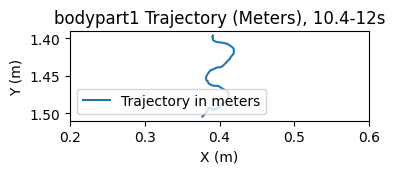

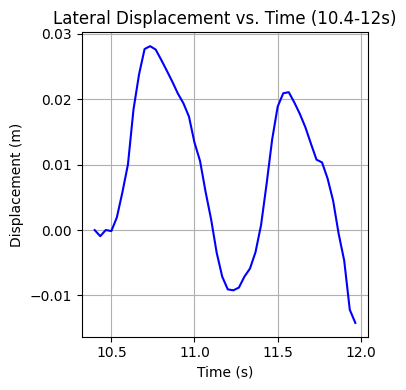

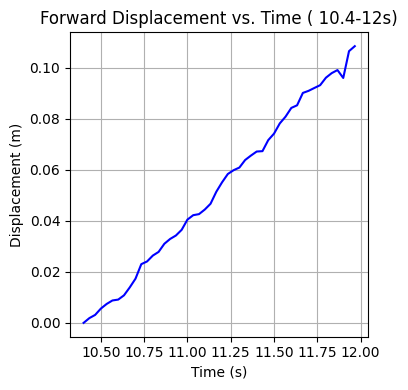

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # Update if needed, e.g., 'bodypart13'
fps = 30  # frames per second
start_time_s = 10.4 # start time in seconds
end_time_s = 12   # end time in seconds

# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920
# --------------------
# Load data
# --------------------
data = pd.read_csv(file_path, header=[1, 2])

# Extract x, y pixel coordinates for the chosen body part
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

# --------------------
# Crop data by time
# --------------------
start_frame = int(start_time_s * fps)
end_frame = int(end_time_s * fps)

x_pixels_cropped = x_pixels[start_frame:end_frame]
y_pixels_cropped = y_pixels[start_frame:end_frame]

# --------------------
# Convert pixels to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m = x_pixels_cropped * scale_x
y_m = y_pixels_cropped * scale_y

# --------------------
# Plot trajectory
# --------------------
plt.figure(figsize=(4, 4))
plt.plot(x_m, y_m, linestyle='-', label='Trajectory in meters')  # No marker specified

plt.title(f"{bodypart_name} Trajectory (Meters), {start_time_s}-{end_time_s}s")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.xlim(0.2,0.6)
# Make sure 1m in X is the same size as 1m in Y
plt.gca().set_aspect('equal', adjustable='box')

# If your coordinate system has Y increasing downwards, invert the Y axis
plt.gca().invert_yaxis()

plt.legend()
plt.tight_layout()
plt.show()

# --------------------
# 2) Plot displacement vs. time Y
# --------------------
# Displacement is distance from the initial position in the cropped data
x0, y0 = x_m.iloc[0], y_m.iloc[0]  # initial position
x_displacement = x_m - x0
y_displacement = y_m - y0 

# Create a time axis for the cropped frames
# e.g., 0 -> N-1 frames (where N == len(x_m)), in seconds
num_frames = len(x_m)
time_axis = np.arange(num_frames) / fps + start_time_s

plt.figure(figsize=(4, 4))
plt.plot(time_axis, x_displacement, linestyle='-', color='blue')
plt.title(f"Lateral Displacement vs. Time ({start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()



plt.figure(figsize=(4, 4))
plt.plot(time_axis, y_displacement, linestyle='-', color='blue')
plt.title(f"Forward Displacement vs. Time ( {start_time_s}-{end_time_s}s)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


Intervals: [(4.0, 5.6), (5.6, 7.199999999999999), (7.199999999999999, 8.799999999999999), (8.799999999999999, 10.399999999999999), (10.399999999999999, 11.999999999999998), (11.999999999999998, 12.0)]


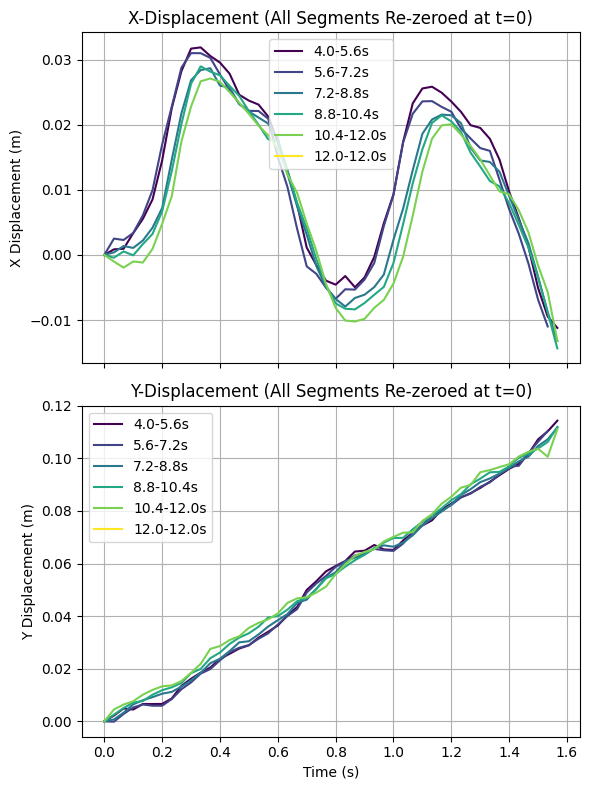

Intervals: [(4.0, 5.6), (5.6, 7.199999999999999), (7.199999999999999, 8.799999999999999), (8.799999999999999, 10.399999999999999), (10.399999999999999, 11.999999999999998), (11.999999999999998, 12.0)]


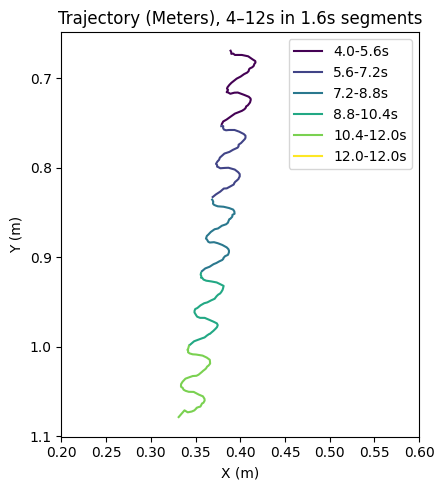

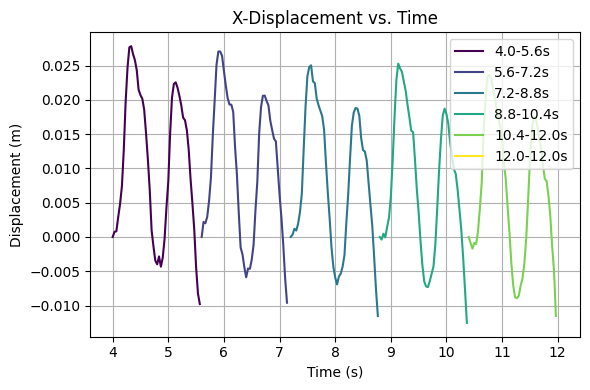

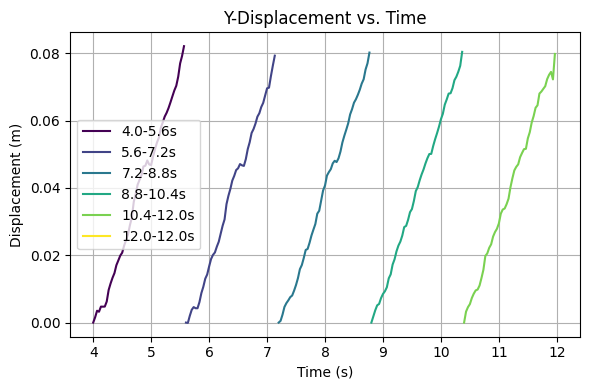

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # e.g., 'bodypart13'
fps = 30  # frames per second

# We want to break [4 s, 12 s] into intervals of 1.6 s each:
start_time_s = 4.0
end_time_s = 12.0
interval_length_s = 1.6

# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920

# --------------------
# Load data (only once)
# --------------------
data = pd.read_csv(file_path, header=[1, 2])
x_pixels_full = data[(bodypart_name, 'x')]
y_pixels_full = data[(bodypart_name, 'y')]

# --------------------
# Convert full data to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m_full = x_pixels_full * scale_x
y_m_full = y_pixels_full * scale_y

# --------------------
# Build intervals in a loop to avoid rounding issues
# --------------------
intervals = []
current_start = start_time_s

while current_start < end_time_s:
    current_end = current_start + interval_length_s
    # If we overshoot, clamp to end_time_s
    if current_end > end_time_s:
        current_end = end_time_s
    intervals.append((current_start, current_end))
    current_start = current_end

print("Intervals:", intervals)
# Expect: [(4.0, 5.6), (5.6, 7.2), (7.2, 8.8), (8.8, 10.4), (10.4, 12.0)]

# Prepare distinct colors for each interval
colors = plt.cm.viridis(np.linspace(0, 1, len(intervals)))

# --------------------
# 1) Plot the trajectories (all intervals together)
# --------------------
fig_trajectory, ax_trajectory = plt.subplots(figsize=(5, 5))

for i, (t_start, t_end) in enumerate(intervals):
    start_frame = int(t_start * fps)
    end_frame   = int(t_end   * fps)
    
    # Slice the scaled x_m, y_m
    x_m_segment = x_m_full[start_frame:end_frame]
    y_m_segment = y_m_full[start_frame:end_frame]
    
    # Format label to one decimal place
    label_str = f"{t_start:.1f}-{t_end:.1f}s"
    
    ax_trajectory.plot(
        x_m_segment,
        y_m_segment,
        linestyle='-',
        color=colors[i],
        label=label_str
    )

ax_trajectory.set_title("Trajectory (Meters), 4–12s in 1.6s segments")
ax_trajectory.set_xlabel("X (m)")
ax_trajectory.set_ylabel("Y (m)")

# Optional x-limit if you want to zoom in
ax_trajectory.set_xlim(0.2, 0.6)

# Equal aspect so 1 m in X is the same as 1 m in Y
ax_trajectory.set_aspect('equal', adjustable='box')
ax_trajectory.invert_yaxis()  # invert if your coordinate system has Y increasing downwards
ax_trajectory.legend()
plt.tight_layout()
plt.show()

# --------------------
# 2) Plot X-displacement vs. time (all intervals together)
# --------------------
fig_xdisp, ax_xdisp = plt.subplots(figsize=(6, 4))

for i, (t_start, t_end) in enumerate(intervals):
    start_frame = int(t_start * fps)
    end_frame   = int(t_end   * fps)
    
    x_m_segment = x_m_full[start_frame:end_frame]
    if len(x_m_segment) == 0:
        continue
    
    # Displacement relative to the first frame of this segment
    x0 = x_m_segment.iloc[0]
    x_displacement = x_m_segment - x0
    
    # Time axis for the segment in absolute scale (4 -> 12s)
    num_frames = len(x_m_segment)
    time_axis = np.arange(num_frames) / fps + t_start
    
    label_str = f"{t_start:.1f}-{t_end:.1f}s"
    
    ax_xdisp.plot(
        time_axis,
        x_displacement,
        linestyle='-',
        color=colors[i],
        label=label_str
    )

ax_xdisp.set_title("X-Displacement vs. Time")
ax_xdisp.set_xlabel("Time (s)")
ax_xdisp.set_ylabel("Displacement (m)")
ax_xdisp.grid(True)
ax_xdisp.legend()
plt.tight_layout()
plt.show()

# --------------------
# 3) Plot Y-displacement vs. time (all intervals together)
# --------------------
fig_ydisp, ax_ydisp = plt.subplots(figsize=(6, 4))

for i, (t_start, t_end) in enumerate(intervals):
    start_frame = int(t_start * fps)
    end_frame   = int(t_end   * fps)
    
    y_m_segment = y_m_full[start_frame:end_frame]
    if len(y_m_segment) == 0:
        continue
    
    # Displacement relative to the first frame of this segment
    y0 = y_m_segment.iloc[0]
    y_displacement = y_m_segment - y0
    
    # Time axis for the segment
    num_frames = len(y_m_segment)
    time_axis = np.arange(num_frames) / fps + t_start
    
    label_str = f"{t_start:.1f}-{t_end:.1f}s"
    
    ax_ydisp.plot(
        time_axis,
        y_displacement,
        linestyle='-',
        color=colors[i],
        label=label_str
    )

ax_ydisp.set_title("Y-Displacement vs. Time")
ax_ydisp.set_xlabel("Time (s)")
ax_ydisp.set_ylabel("Displacement (m)")
ax_ydisp.grid(True)
ax_ydisp.legend()
plt.tight_layout()
plt.show()


Intervals: [(4.0, 5.6), (5.6, 7.199999999999999), (7.199999999999999, 8.799999999999999), (8.799999999999999, 10.399999999999999), (10.399999999999999, 11.999999999999998), (11.999999999999998, 12.0)]


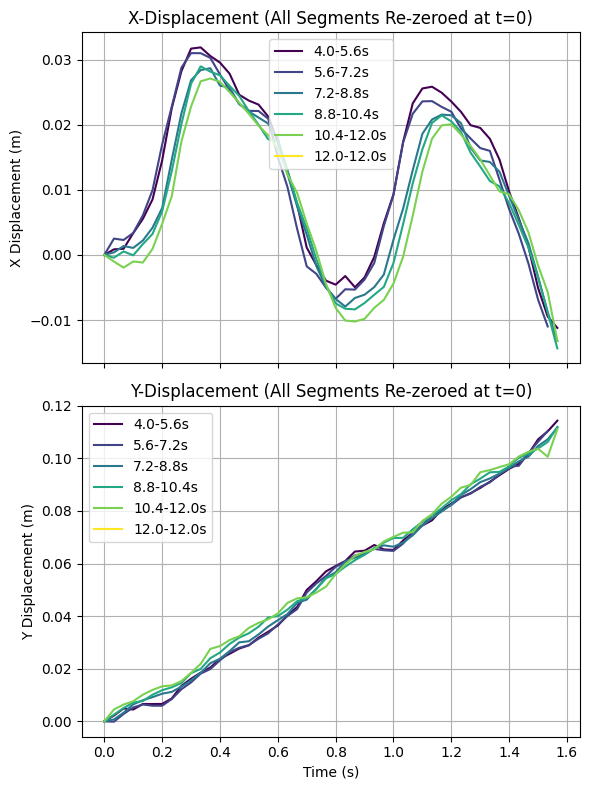

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # e.g. 'bodypart13'
fps = 30  # frames per second

# We want to break [4 s, 12 s] into intervals of 1.6 s each:
start_time_s = 4.0
end_time_s = 12.0
interval_length_s = 1.6
# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920

# --------------------
# Load data (only once)
# --------------------
data = pd.read_csv(file_path, header=[1, 2])
x_pixels_full = data[(bodypart_name, 'x')]
y_pixels_full = data[(bodypart_name, 'y')]

# --------------------
# Convert full data to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m_full = x_pixels_full * scale_x
y_m_full = y_pixels_full * scale_y

# --------------------
# Build intervals in a loop to avoid rounding issues
# --------------------
intervals = []
current_start = start_time_s

while current_start < end_time_s:
    current_end = current_start + interval_length_s
    if current_end > end_time_s:
        current_end = end_time_s
    intervals.append((current_start, current_end))
    current_start = current_end

print("Intervals:", intervals)
# Expect: [(4.0, 5.6), (5.6, 7.2), (7.2, 8.8), (8.8, 10.4), (10.4, 12.0)]

# Prepare distinct colors for each interval
colors = plt.cm.viridis(np.linspace(0, 1, len(intervals)))

# --------------------
# Plot X & Y displacement on one figure
#   - Each interval re-zeroed at t = 0
#   - Show all intervals on the same axes
# --------------------
fig, (ax_xdisp, ax_ydisp) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

for i, (t_start, t_end) in enumerate(intervals):
    start_frame = int(t_start * fps)
    end_frame   = int(t_end   * fps)
    
    # Extract data for this interval
    x_m_segment = x_m_full[start_frame:end_frame]
    y_m_segment = y_m_full[start_frame:end_frame]
    
    # If empty, skip
    if len(x_m_segment) == 0:
        continue
    
    # Displacements relative to the first frame of this segment
    x0 = x_m_segment.iloc[0]
    y0 = y_m_segment.iloc[0]
    x_displacement = x_m_segment - x0
    y_displacement = y_m_segment - y0
    
    # Build time axis from 0 to (interval_length_s) for each segment
    num_frames = len(x_m_segment)
    time_axis = np.arange(num_frames) / fps  # <--- starts at 0

    # Label shows the real time window, but data is plotted from 0 upward
    label_str = f"{t_start:.1f}-{t_end:.1f}s"
    
    # Plot X displacement
    ax_xdisp.plot(
        time_axis,
        x_displacement,
        linestyle='-',
        color=colors[i],
        label=label_str
    )
    
    # Plot Y displacement
    ax_ydisp.plot(
        time_axis,
        y_displacement,
        linestyle='-',
        color=colors[i],
        label=label_str
    )

ax_xdisp.set_title("X-Displacement (All Segments Re-zeroed at t=0)")
ax_xdisp.set_ylabel("X Displacement (m)")
ax_xdisp.grid(True)
ax_xdisp.legend()

ax_ydisp.set_title("Y-Displacement (All Segments Re-zeroed at t=0)")
ax_ydisp.set_xlabel("Time (s)")
ax_ydisp.set_ylabel("Y Displacement (m)")
ax_ydisp.grid(True)
ax_ydisp.legend()

plt.tight_layout()
plt.show()
